In [77]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

%matplotlib inline

In [78]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

True

## Part 1 - Personal Finance Planner

In [90]:
# Set monthly household income
monthly_income = 12000

### Collect Crypto Prices Using the requests Library


In [80]:
# Current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [81]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [82]:
# Fetch current BTC price
btc_response = requests.get(btc_url).json()
#print(json.dumps(btc_response,indent=4))
btc_price = btc_response["data"]["1"]["quotes"]["USD"]["price"] 

# Fetch current ETH price
eth_response = requests.get(eth_url).json()
#print(json.dumps(eth_response,indent=4))
eth_price = eth_response["data"]["1027"]["quotes"]["USD"]["price"]

# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $13849.02
The current value of your 5.3 ETH is $2043.57


### Collect Investments Data Using Alpaca: SPY (stocks) and AGG (bonds)

In [83]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [84]:
# Set Alpaca API key and secret
alpaca_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_key,
    alpaca_secret_key,
    api_version='v2')

In [85]:
# Format current date as ISO format
today = pd.Timestamp("2020-10-9",tz='America/New_York').isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_tickers = api.get_barset(
    tickers,
    timeframe,
    start=today,
    end=today
).df

df_tickers.index = df_tickers.index.date

# Pick AGG and SPY close prices
agg_close_price = float(df_tickers['AGG']['close'])
spy_close_price = float(df_tickers['SPY']['close'])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.705
Current SPY closing price: $346.84


In [86]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $17342.00
The current value of your 200 AGG shares is $23541.00


### Savings Health Analysis

In [87]:
# Create savings DataFrame
crypto = my_btc_value + my_eth_value
shares = my_spy_value + my_agg_value

df_savings = pd.DataFrame({'amount':[crypto,shares]},
             index=['crypto','shares'])

# Display savings DataFrame
display(df_savings)

,amount
crypto,15892.594
shares,40883.000


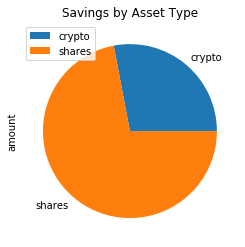

In [88]:
# Plot savings pie chart
df_savings.plot.pie(y='amount',title='Savings by Asset Type')

In [93]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = crypto + shares

# Validate saving health
if total_savings >= emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")
else:
    print(f"You don't quite have enough savings for an ideal emergency fund. You have {total_savings} and an ideal amount is {emergency_fund}")

Congratulations! You have enough money in your emergency fund.


Part 2 - Retirement Planning